In [136]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_score

Source data is from http://archive.ics.uci.edu/ml/datasets/online+retail
It is a 541909 × 8 matrix that contains a UK-based online retail store's sales data occurring between 01/12/2010 and 09/12/2011

In [ ]:
# import data from csv file
data=pd.read_csv("OnlineRetail.csv",encoding='latin1')

In [160]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Data Cleaning

In [33]:
# Remove rows where quantity of item and unit price is 0
data=data.loc[data["Quantity"]>0]
data=data.loc[data["UnitPrice"]>0]

In [159]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [35]:
#drop all rows of data that has empty items
data=data.dropna()

In [158]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [37]:
# Isolate data from the United Kingdom (to make dataset more manageable and focused for actionable insights)
data=data.loc[data["Country"]=="United Kingdom"]

In [157]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Data Computation

In [38]:
# Calculate the total sale of one merchandise in an order
data["Sales"]=data["Quantity"]*data["UnitPrice"]

In [156]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [62]:
# group data by unique Customer IDs and create new df for it
# new index are unique CostumerIDs
# new column titles would be Sales and InvoiceNo
customer_df=data.groupby("CustomerID").agg({"Sales":"sum","InvoiceNo": pd.Series.nunique})

In [155]:
customer_df.head()

,TotalSales,OrderCount,AverageSale
CustomerID,,,
12346.0,77183.60,1,77183.600000
12747.0,4196.01,11,381.455455
12748.0,33719.73,209,161.338421
12749.0,4090.88,5,818.176000
12820.0,942.34,4,235.585000


In [66]:
#change the name to TotalSales and OrderCount
customer_df.columns = ['TotalSales', 'OrderCount'] 

In [154]:
customer_df.head()

,TotalSales,OrderCount,AverageSale
CustomerID,,,
12346.0,77183.60,1,77183.600000
12747.0,4196.01,11,381.455455
12748.0,33719.73,209,161.338421
12749.0,4090.88,5,818.176000
12820.0,942.34,4,235.585000


In [68]:
# create new column of average sales per customer
customer_df["AverageSale"]=customer_df["TotalSales"]/customer_df["OrderCount"]

In [153]:
customer_df.head()

,TotalSales,OrderCount,AverageSale
CustomerID,,,
12346.0,77183.60,1,77183.600000
12747.0,4196.01,11,381.455455
12748.0,33719.73,209,161.338421
12749.0,4090.88,5,818.176000
12820.0,942.34,4,235.585000


# Normalizing table with z-scores

Z-score (or **standard score**) gives the number of standard deviation that a raw score is above or below the mean. Z-scores are used to normalize sets of data into a **standard normal distribution**.

It is important to normalize data and variance using z-score before using k-means clustering because k-means algorithm is highly sensitive to case order and difference in variance. More reading on this: https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering

To prove this, I will conduct clustering algorithm on both normalized and unnormalized data.

z score formula:

z=(x-mean)/std

In [127]:
#create new df where each number is ranked
rank_df=customer_df.rank(method="first")
normal_df=(rank_df-rank_df.mean())/rank_df.std()

In [161]:
# Every data point is now in the range of -2 to 2
normal_df.head()

,TotalSales,OrderCount,AverageSale
CustomerID,,,
12346.0,1.726970,-1.731388,1.730505
12747.0,1.481333,1.459243,0.734702
12748.0,1.711066,1.731388,-0.990059
12749.0,1.468079,0.842500,1.558205
12820.0,0.397172,0.531477,-0.299978


# Clustering Using K-Means Algorithm

**Find the optimal value for k using Silhouette Coefficient**

In [118]:
for cluster in range (4,10):
    kmeans=KMeans(n_clusters=cluster).fit(normal_df)

    silhouette=silhouette_score(normal_df[["TotalSales","OrderCount","AverageSale"]],kmeans.labels_)
    print(f"clutser {cluster} silhouette score: {silhouette}")

clutser 4 silhouette score: 0.4154254888790518
clutser 5 silhouette score: 0.379823130137322
clutser 6 silhouette score: 0.3798804123733054
clutser 7 silhouette score: 0.3779178889228902
clutser 8 silhouette score: 0.3803335874950648
clutser 9 silhouette score: 0.3767077595379914


*Having 4 clusters produces the highest Silhouette Score*

**Find the optimal value for k using the Elbow Method with Sum of Squared Errors (SSE)**

In [145]:
sse=[]
Krange=list(range(2,11))
X=normal_df[["TotalSales","OrderCount","AverageSale"]]
for n in Krange:
    kmeans=KMeans(n_clusters=n)
    kfit=kmeans.fit(X)
    sse.append(kfit.inertia_)
    print(f"K={n}, SSE={kfit.inertia_}")

K=2, SSE=5783.987829293202
K=3, SSE=3844.2174975522153
K=4, SSE=2726.079036578782
K=5, SSE=2258.6439706811047
K=6, SSE=1868.1590041641045
K=7, SSE=1594.751592552319
K=8, SSE=1383.839496749953
K=9, SSE=1216.882894077046
K=10, SSE=1111.9882658950191


**Plot using matplotlib to see the optimal number of cluster**

With the **Elbow Method**, we look at the line graph as an arm, and the the best spot for k is where the elbow is

Reference: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

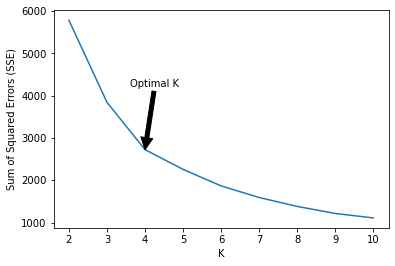

In [152]:
plt.plot(Krange,sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.annotate("Optimal K",xytext=(3.6,4200),xy=(4,2726.08),arrowprops={"facecolor":"black"})
plt.show()

We have used both the Silhouette Coefficient and Elbow Method to find that the optimal number of cluster is **k=4**

# Analyzing the 4 Customer Segments

In [187]:
# Calculate K-means with k=4
km=KMeans(n_clusters=4).fit(normal_df[["TotalSales","OrderCount","AverageSale"]])

In [188]:
# Create a copy to the original dataframe so to not contaminate the original data
normal_copy=normal_df[["TotalSales","OrderCount","AverageSale"]].copy(deep=True)

In [189]:
# Create new column with cluster labels 0-3
normal_copy["Clusters"]=km.labels_

In [190]:
normal_copy.head()

,TotalSales,OrderCount,AverageSale,Clusters
CustomerID,,,,
12346.0,1.726970,-1.731388,1.730505,2
12747.0,1.481333,1.459243,0.734702,0
12748.0,1.711066,1.731388,-0.990059,3
12749.0,1.468079,0.842500,1.558205,0
12820.0,0.397172,0.531477,-0.299978,3


In [193]:
cluster_1=kmeans.cluster_centers_[0]
print(f"cluster 1 center: {cluster_1}")
cluster_2=kmeans.cluster_centers_[1]
print(f"cluster 2 center: {cluster_2}")
cluster_3=kmeans.cluster_centers_[2]
print(f"cluster 3 center: {cluster_3}")
cluster_4=kmeans.cluster_centers_[3]
print(f"cluster 4 center: {cluster_4}")

cluster 1 center: [ 1.14977072  1.42246872 -0.3474994 ]
cluster 2 center: [-0.06029643 -0.08260103  0.00301614]
cluster 3 center: [0.74512976 0.75705818 0.34453021]
cluster 4 center: [-1.46589392 -1.11960605 -1.23116416]


In [196]:
# Create new DataFrame to store cluster metrics
cluster_center_df=pd.DataFrame([cluster_1,cluster_2,cluster_3,cluster_4])

In [198]:
cluster_center_df.columns=["TotalSales","OrderCount","AverageSale"]

In [199]:
cluster_center_df

,TotalSales,OrderCount,AverageSale
0,1.149771,1.422469,-0.347499
1,-0.060296,-0.082601,0.003016
2,0.745130,0.757058,0.344530
3,-1.465894,-1.119606,-1.231164


# Cluster Visualization

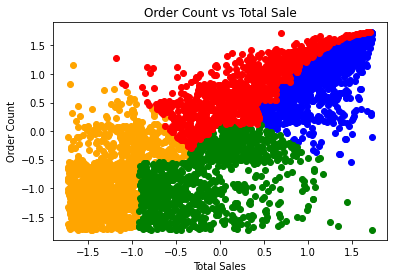

In [216]:
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==0]["TotalSales"],normal_copy.loc[normal_copy["Clusters"]==0]["OrderCount"],c="blue")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==1]["TotalSales"],normal_copy.loc[normal_copy["Clusters"]==1]["OrderCount"],c="orange")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==2]["TotalSales"],normal_copy.loc[normal_copy["Clusters"]==2]["OrderCount"],c="green")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==3]["TotalSales"],normal_copy.loc[normal_copy["Clusters"]==3]["OrderCount"],c="red")
plt.ylabel("Order Count")
plt.xlabel("Total Sales")
plt.title("Order Count vs Total Sale")
plt.show()

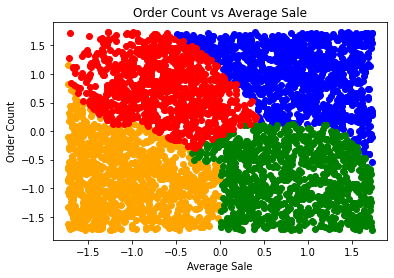

In [215]:
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==0]["AverageSale"],normal_copy.loc[normal_copy["Clusters"]==0]["OrderCount"],c="blue")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==1]["AverageSale"],normal_copy.loc[normal_copy["Clusters"]==1]["OrderCount"],c="orange")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==2]["AverageSale"],normal_copy.loc[normal_copy["Clusters"]==2]["OrderCount"],c="green")
plt.scatter(normal_copy.loc[normal_copy["Clusters"]==3]["AverageSale"],normal_copy.loc[normal_copy["Clusters"]==3]["OrderCount"],c="red")
plt.ylabel("Order Count")
plt.xlabel("Average Sale")
plt.title("Order Count vs Average Sale")
plt.show()

From the scatter plots above, we see that the blue cluster (cluster 0) purchases most items and is also the group that has the highest average sale and total sale. They are currently our highest-value customers. 

However, it is also important to notice the red and green clusters. 

The red cluster (cluster 3) customers have the habit of buying a high quantity of low-value merchandise, but the total sale amount for cluster 3 customers are significant. The company should be promoting more high-value items to customers in this cluster and try to up-sell merchandise to them.

The green cluster (cluster 2) mostly only buy high-value items in a small amount. The company can consider increasing its order count by email reminders and occasional discount offerings.

Clusters 2 and 3 are the highest potential customers as there are many areas to grow with these customers.